<a href="https://colab.research.google.com/github/hrishikeshmane87933/TensorFlow_examples/blob/master/basic_classification_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
print(tf.__version__)

1.13.0-rc1


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
dataset=keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels)=dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

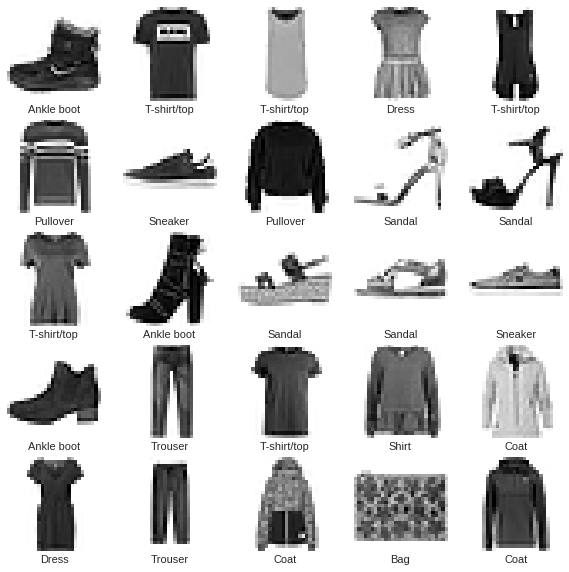

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
]
)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 144us/sample - loss: 0.4975 - acc: 0.8247
Epoch 2/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.3773 - acc: 0.8645
Epoch 3/5
60000/60000 [==============================] - 8s 132us/sample - loss: 0.3397 - acc: 0.8769
Epoch 4/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.3149 - acc: 0.8841
Epoch 5/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.2967 - acc: 0.8905


In [0]:
test_loss,test_acc=model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.3474 - acc: 0.8758


In [0]:
print(test_acc)

0.8758


In [0]:
predictions=model.predict(test_images)

In [0]:
predictions

array([[1.1360868e-04, 4.2048018e-08, 1.8293845e-06, ..., 3.3973366e-02,
        3.8539925e-05, 9.5779300e-01],
       [3.9126760e-05, 7.0315080e-11, 9.9574959e-01, ..., 2.0861026e-12,
        1.0976742e-06, 1.3178092e-14],
       [5.1244615e-06, 9.9999428e-01, 2.7878700e-08, ..., 1.3888177e-12,
        5.3477534e-10, 5.9367218e-14],
       ...,
       [1.9445103e-03, 2.1118238e-07, 3.7207222e-04, ..., 2.1698245e-08,
        9.9524271e-01, 4.3454072e-08],
       [1.8984556e-06, 9.9954814e-01, 1.8429423e-06, ..., 5.1316968e-09,
        1.2503784e-07, 1.5698875e-08],
       [1.4188741e-03, 6.2773986e-05, 8.7569997e-04, ..., 7.0037492e-02,
        8.0349818e-03, 1.6113593e-03]], dtype=float32)

In [0]:
np.argmax(predictions[0])

9

In [0]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

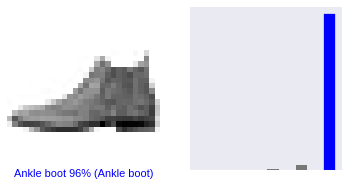

In [0]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

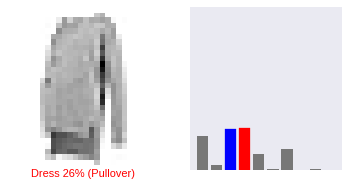

In [0]:
i = 66
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

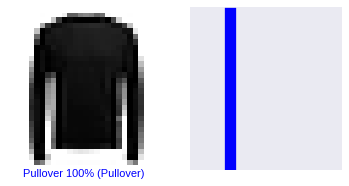

In [0]:
i = 77
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

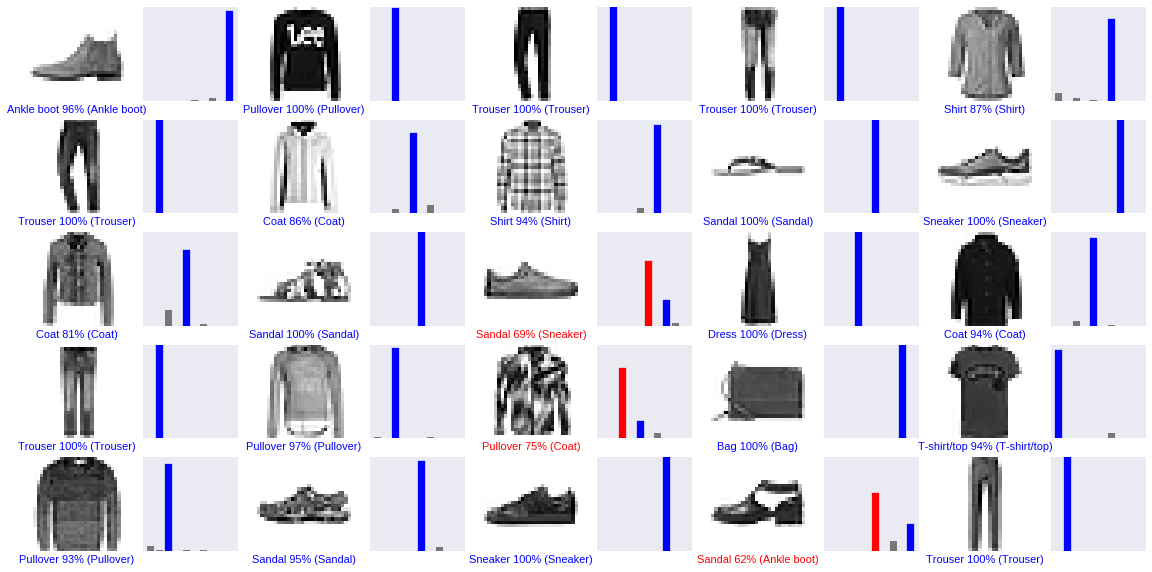

In [0]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [0]:
# Grab an image from the test dataset
img = test_images[0]

#tf.keras models are optimized to make predictions on a batch, or collection,
#of examples at once. So even though we're using a single image, we need to add it to a list
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [0]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.1360846e-04 4.2048100e-08 1.8293809e-06 2.1234512e-06 4.3510431e-06
  8.0229398e-03 5.0091588e-05 3.3973340e-02 3.8539885e-05 9.5779300e-01]]


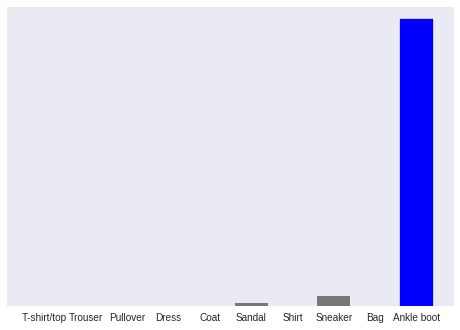

In [0]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names)

In [0]:
np.argmax(predictions_single[0])

9